In [0]:
########################################
# Instalacion de paquetes
if (!requireNamespace("caret"))
  install.packages("caret")
if (!requireNamespace("tidyverse"))
  install.packages("tidyverse")
if (!requireNamespace("ggpubr"))
  install.packages("ggpubr")
if (!requireNamespace("randomForest"))
  install.packages("randomForest")
if (!requireNamespace("doParallel"))
  install.packages("doParallel")
if (!requireNamespace("dplyr"))
  install.packages("dplyr")
if (!requireNamespace("kernlab"))
  install.packages("kernlab")
if (!requireNamespace("gbm"))
  install.packages("gbm")
if (!requireNamespace("ggplot2"))
  install.packages("ggplot2")
if (!requireNamespace("e1071"))
  install.packages("e1071")
if (!requireNamespace("ranger"))
  install.packages("ranger")

Loading required namespace: caret

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’


Loading required namespace: tidyverse

Loading required namespace: ggpubr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’


Loading required namespace: randomForest

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required namespace: doParallel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required namespace: kernlab

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required namespace: gbm

Installing package into ‘/usr/local/lib/R/site-libr

In [0]:
##################################
# Include
library(caret)
library(tidyverse)
library(randomForest)
library(ggpubr)
library(doParallel)
library(dplyr)
library(kernlab)
library(gbm)
library(ggplot2)
library(e1071)
library(ranger)

Loading required package: lattice

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: foreach


Attaching package: ‘foreach’


In [0]:
###################################
# Paralelismo
parallel::detectCores()

cl <- makePSOCKcluster(2)

registerDoParallel(cl)

[1] 2

In [0]:
####################################
# Lectura de los datos
datos_castillo <- read_csv("/content/final_dataset_castillodelromeral.csv", 
    col_types = cols(.default = col_character()))
datos_castillo %>% mutate_if(is.character, as.factor)

Hora,SO2,NO,PM1.0,PM2.5,O3,CO,NO2
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,3,13,67,23,33,0.1,34
2,3,6,71,21,35,0.1,32
3,4,5,15,19,36,0.1,27
4,5,4,47,22,31,0.1,35
5,3,5,66,13,44,0.1,22
6,3,4,43,13,46,0.1,19
7,3,6,18,8,14,0.1,52
8,3,8,16,13,25,0.1,41
9,3,10,52,18,46,0.1,23


In [0]:
#####################################
# Resumen de los datos
glimpse(datos_castillo)

Observations: 8,784
Variables: 8
$ Hora  <chr> "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", …
$ SO2   <chr> "3", "3", "4", "5", "3", "3", "3", "3", "3", "4", "3", "3", "3"…
$ NO    <chr> "13", "6", "5", "4", "5", "4", "6", "8", "10", "15", "7", "5", …
$ PM1.0 <chr> "67", "71", "15", "47", "66", "43", "18", "16", "52", "42", "38…
$ PM2.5 <chr> "23", "21", "19", "22", "13", "13", "8", "13", "18", "13", "13"…
$ O3    <chr> "33", "35", "36", "31", "44", "46", "14", "25", "46", "46", "61…
$ CO    <chr> "0.1", "0.1", "0.1", "0.1", "0.1", "0.1", "0.1", "0.1", "0.1", …
$ NO2   <chr> "34", "32", "27", "35", "22", "19", "52", "41", "23", "26", "13…


In [0]:
####################################
# PREPROCESADO DE LOS DATOS
####################################
# Establecer NA de R
datos_castillo$NO[datos_castillo$NO == "N"] <- NA
datos_castillo$NO2[datos_castillo$NO2 == "N"] <- NA
datos_castillo$PM1.0[datos_castillo$PM1.0 == "N"] <- NA
datos_castillo$PM2.5[datos_castillo$PM2.5 == "N"] <- NA
datos_castillo$O3[datos_castillo$O3 == "N"] <- NA
datos_castillo$CO[datos_castillo$CO == "N"] <- NA
datos_castillo$NO2[datos_castillo$NO2 == "N"] <- NA

In [0]:
# Establecer todos los datos a numerico
datos_castillo$Hora <- as.numeric(datos_castillo$Hora)
datos_castillo$SO2 <- as.numeric(datos_castillo$SO2)
datos_castillo$NO <- as.numeric(datos_castillo$NO)
datos_castillo$PM1.0 <- as.numeric(datos_castillo$PM1.0)
datos_castillo$PM2.5 <- as.numeric(datos_castillo$PM2.5)
datos_castillo$O3 <- as.numeric(datos_castillo$O3)
datos_castillo$CO <- as.numeric(datos_castillo$CO)
datos_castillo$NO2 <- as.numeric(datos_castillo$NO2)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [0]:
####################################
# Resumen de los datos
glimpse(datos_castillo)

# Obtener el numero de entradas
nrow(datos_castillo)

Observations: 8,784
Variables: 8
$ Hora  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, …
$ SO2   <dbl> 3, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, …
$ NO    <dbl> 13, 6, 5, 4, 5, 4, 6, 8, 10, 15, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ PM1.0 <dbl> 67, 71, 15, 47, 66, 43, 18, 16, 52, 42, 38, 28, 27, 38, 42, 25,…
$ PM2.5 <dbl> 23, 21, 19, 22, 13, 13, 8, 13, 18, 13, 13, 9, 13, 12, 11, 12, 1…
$ O3    <dbl> 33, 35, 36, 31, 44, 46, 14, 25, 46, 46, 61, 69, 71, 73, 78, 76,…
$ CO    <dbl> 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1…
$ NO2   <dbl> 34, 32, 27, 35, 22, 19, 52, 41, 23, 26, 13, 7, 6, 7, 6, 8, 7, 2…


[1] 8784

In [0]:
####################################
# Comprobar si hay alguna fila incompleta
any(!complete.cases(datos_castillo))

# Numero de datos ausentes por variable
map_dbl(datos_castillo, .f = function(x){sum(is.na(x))})

[1] TRUE

Hora   SO2    NO PM1.0 PM2.5    O3    CO   NO2 
    0    19    22   119    86   115    13    22

In [0]:
####################################
#Para eliminar las filas con valor nulo en la clase
datos_castillo <- datos_castillo[!is.na(datos_castillo$NO2),]
datos_castillo <- datos_castillo[!is.na(datos_castillo$NO),]
datos_castillo <- datos_castillo[!is.na(datos_castillo$PM1.0),]
datos_castillo <- datos_castillo[!is.na(datos_castillo$PM2.5),]
datos_castillo <- datos_castillo[!is.na(datos_castillo$O3),]
datos_castillo <- datos_castillo[!is.na(datos_castillo$CO),]
datos_castillo <- datos_castillo[!is.na(datos_castillo$SO2),]

In [0]:
####################################
# Numero de datos ausentes por variable
map_dbl(datos_castillo, .f = function(x){sum(is.na(x))})

# Obtener el numero de entradas
nrow(datos_castillo)

Hora   SO2    NO PM1.0 PM2.5    O3    CO   NO2 
    0     0     0     0     0     0     0     0

[1] 8511

In [0]:
####################################
# Identificar que variables contienen valores ""
datos_castillo %>% map_lgl(.f = function(x){any(!is.na(x) & x == "")})

Hora   SO2    NO PM1.0 PM2.5    O3    CO   NO2 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [0]:
# Mirar la varianza de Class
#Los predictores con cero-varianza o con varianza próxima a cero no se deben incluir
#pues no aportan información, ya que estos predictores toman solo unos pocos valores
#que algunos aparecen con poca frecuencia.
datos_castillo %>% select(NO2) %>% nearZeroVar(saveMetrics = TRUE)

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
NO2,1.003515,0.7167195,FALSE,FALSE


In [0]:
####################################
# Division de los datos en entrenamiento y testeo

set.seed(123)

In [0]:
# Se crean los indices de las observaciones de entrenamiento
train <- createDataPartition(y = datos_castillo$NO2, p = 0.8, list = FALSE, times = 1)
   
datos_train <- datos_castillo[train, ]
datos_test  <- datos_castillo[-train, ]

In [0]:
#####################################
#         RANDOM FOREST             #
#####################################

##################################
# 1.
# Metodo de entrenamiento repeatedcv sobre randomForest
#
# repeatedcv: permite hacer repeticiones
# trainControl: Controla los matices de calculo de la funcion train
# tuneLength: El parametro le dice al algoritmo que pruebe diferentes valores predeterminados
#   para el parametro principal
# repeats: numero de iteraciones de remuestreo
# metric: RMSE (Raiz del error cuadratico medio)
#
set.seed(123)
tc <- trainControl(method="repeatedcv",
                  number=8,
                  repeats=4,
                  verboseIter = FALSE,
                  allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train ,
                method='rf',
                trControl=tc,
                tuneLength=6,
                importance=TRUE,
                metric='RMSE')
modelo

Random Forest 

6811 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 4 times) 
Summary of sample sizes: 5960, 5960, 5961, 5959, 5959, 5958, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     4.515748  0.6734158  3.114337
  3     4.511609  0.6681854  3.089219
  4     4.543505  0.6623907  3.103661
  5     4.563794  0.6590809  3.113343
  6     4.583344  0.6560488  3.126219
  7     4.597303  0.6538754  3.134312

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.

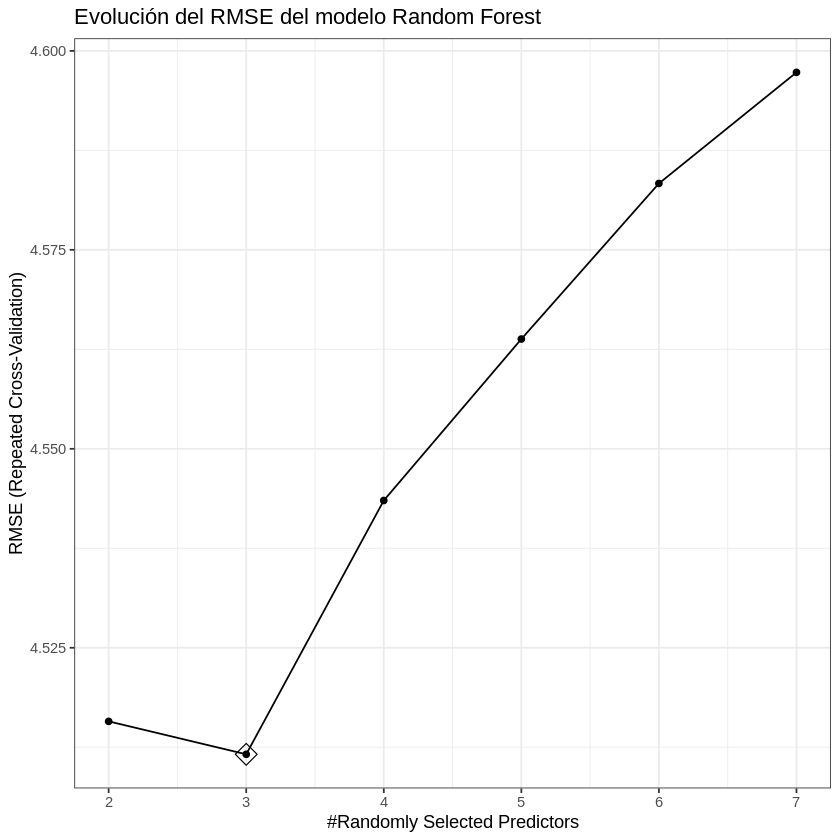

In [0]:
####################################
# Grafica
ggplot(modelo, highlight = TRUE) +
  scale_x_continuous(breaks = 1:30) +
  labs(title = "Evolución del RMSE del modelo Random Forest con repeatedCV") +
  guides(color = guide_legend(title = "mtry"),
         shape = guide_legend(title = "mtry")) +
  theme_bw()

In [0]:
# Vista de la importancia
#
# finalModel: muestra el tipo de modelo creado, el valor de los hiperparametros 
#    e información adicional
#
varImp(modelo)
modelo$finalModel

rf variable importance

      Overall
O3    100.000
NO     39.163
PM2.5  29.078
Hora   24.091
SO2    12.623
PM1.0   6.001
CO      0.000


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 20.27368
                    % Var explained: 66.82

In [0]:
# Valores metricas
#
# getTrainPerf: proporciona los resultados de rendimiento promedio de 
#   los mejores parametros ajustados promediados en los pliegues de 
#   validaciones cruzadas repetidas
#
getTrainPerf(modelo)

TrainRMSE,TrainRsquared,TrainMAE,method
<dbl>,<dbl>,<dbl>,<chr>
4.511609,0.6681854,3.089219,rf


In [0]:
# Evaluar modelo
#
# predict: Hacer un objeto con predicciones de un objeto modelo ajustado
#     a un entrenamiento previo
# postResample: Dados dos vectores numericos de datos, se calculan el error 
#     cuadratico medio y el R cuadrado
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

RMSE  Rsquared       MAE 
4.3473120 0.6753831 3.0490213

In [0]:
####################################
# 2.
# Metodo de entrenamiento oob sobre randomForest
# 
# oob: es un método para medir el error de predicción de randomForest
#
set.seed(123)
tc <- trainControl("oob",
                   number=8,
                   verboseIter = FALSE,
                   allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train,
                method='rf',
                trControl=tc,
                tuneLength=6,
                importance=TRUE,
                metric='RMSE')
modelo

Random Forest 

6811 samples
   7 predictor

No pre-processing
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared 
  2     4.500362  0.6685671
  3     4.502866  0.6681980
  4     4.527538  0.6645522
  5     4.556288  0.6602783
  6     4.576470  0.6572621
  7     4.584086  0.6561204

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

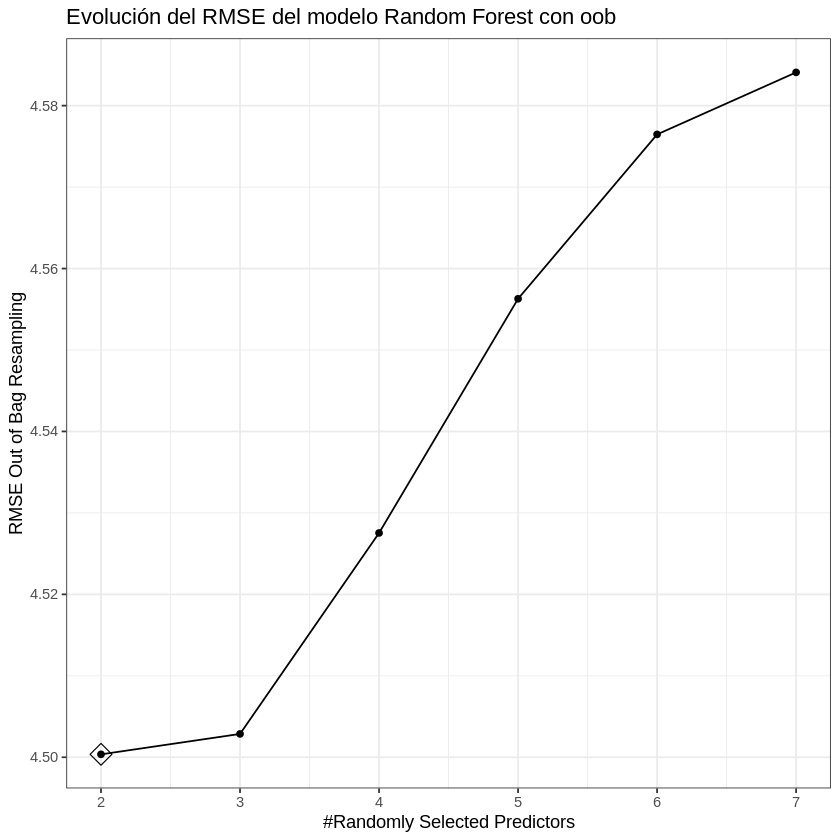

In [0]:
####################################
# Grafica
ggplot(modelo, highlight = TRUE) +
  scale_x_continuous(breaks = 1:30) +
  labs(title = "Evolución del RMSE del modelo Random Forest con oob") +
  guides(color = guide_legend(title = "mtry"),
         shape = guide_legend(title = "mtry")) +
  theme_bw()

In [0]:
# Vista de la importancia
#
varImp(modelo)
modelo$finalModel

rf variable importance

      Overall
O3     100.00
NO      49.46
PM2.5   42.69
Hora    28.04
SO2     20.88
PM1.0   12.98
CO       0.00


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 20.22154
                    % Var explained: 66.91

In [0]:
# Valores metricas
#
getTrainPerf(modelo)

TrainRMSE,TrainRsquared,TrainMAE,method
<dbl>,<dbl>,<dbl>,<chr>
4.540839,0.6564286,3.146157,rf


In [0]:
# Evaluar modelo
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

RMSE Rsquared      MAE 
4.360033 0.679588 3.111691

In [0]:
####################################
# 3.
# Metodo de entrenamiento boot sobre randomForest
# 
# boot: se utiliza para cuantificar la incertidumbre asociada con un 
# estimador dado o un enfoque de aprendizaje estadístico
#
set.seed(123)
tc <- trainControl("boot",
                   number=6, 
                   verboseIter = FALSE,
                   allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train,
                method='rf',
                trControl=tc,
                tuneLength=3,
                importance=TRUE,
                metric='RMSE')
modelo

Random Forest 

6811 samples
   7 predictor

No pre-processing
Resampling: Bootstrapped (6 reps) 
Summary of sample sizes: 6811, 6811, 6811, 6811, 6811, 6811, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     4.540839  0.6564286  3.146157
  4     4.604423  0.6419075  3.161031
  7     4.708091  0.6263386  3.223310

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

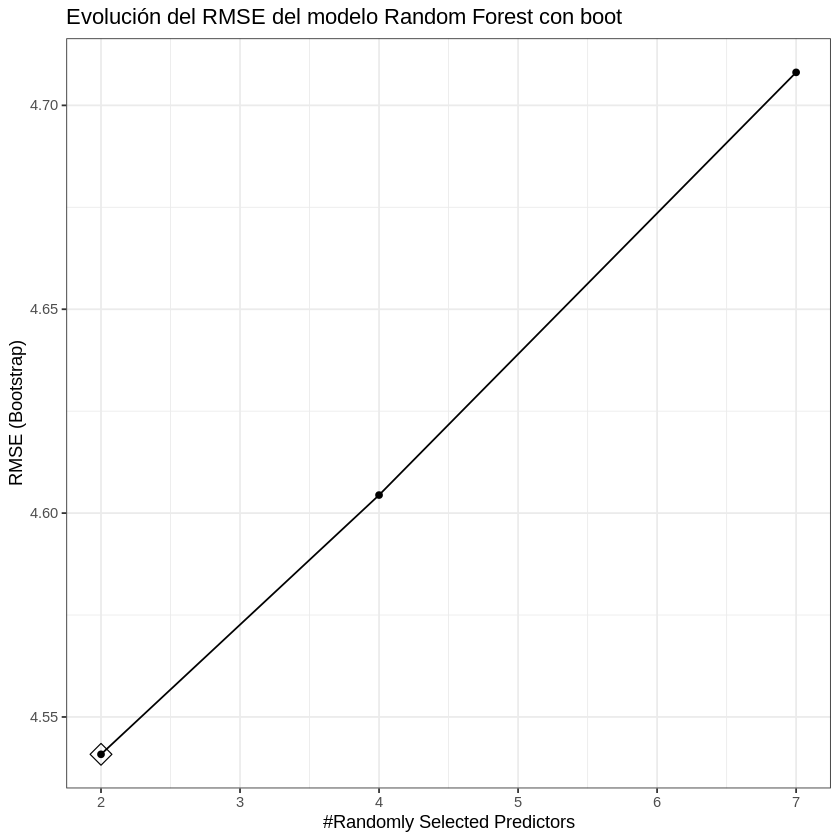

In [0]:
####################################
# Grafica
ggplot(modelo, highlight = TRUE) +
  scale_x_continuous(breaks = 1:30) +
  labs(title = "Evolución del RMSE del modelo Random Forest con boot") +
  guides(color = guide_legend(title = "mtry"),
         shape = guide_legend(title = "mtry")) +
  theme_bw()

In [0]:
# Vista de la importancia rf boot
#
varImp(modelo)
modelo$finalModel

rf variable importance

      Overall
O3     100.00
NO      49.46
PM2.5   42.69
Hora    28.04
SO2     20.88
PM1.0   12.98
CO       0.00


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 20.22154
                    % Var explained: 66.91

In [0]:
# Valores metricas
#
getTrainPerf(modelo)

TrainRMSE,TrainRsquared,TrainMAE,method
<dbl>,<dbl>,<dbl>,<chr>
4.540839,0.6564286,3.146157,rf


In [0]:
# Evaluar modelo
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

RMSE Rsquared      MAE 
4.360033 0.679588 3.111691

In [0]:
#####################################
#         SVM_Linear                #
#####################################

##################################
# 1.
# Metodo de entrenamiento boot sobre SVM-Linear
#
# svm-linear: SVM es un modelo que representa a los puntos de muestra 
# en el espacio
#
set.seed(123)
tc <- trainControl("boot",
                   number=5,
                   verboseIter = FALSE,
                   allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train,
                method='svmLinear',
                trControl=tc,
                tuneLength=3,
                importance=TRUE,
                metric='RMSE')
modelo

Support Vector Machines with Linear Kernel 

6811 samples
   7 predictor

No pre-processing
Resampling: Bootstrapped (5 reps) 
Summary of sample sizes: 6811, 6811, 6811, 6811, 6811 
Resampling results:

  RMSE      Rsquared   MAE     
  5.994952  0.4350647  3.920991

Tuning parameter 'C' was held constant at a value of 1

In [0]:
# Vista de la importancia
#
varImp(modelo)
modelo$finalMode

Warning message in mean.default(y, rm.na = TRUE):
“argument is not numeric or logical: returning NA”


ERROR: ignored

In [0]:
# Valores metricas
#
getTrainPerf(modelo)

TrainRMSE,TrainRsquared,TrainMAE,method
<dbl>,<dbl>,<dbl>,<chr>
5.994952,0.4350647,3.920991,svmLinear


In [0]:
# Evaluar modelo
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

RMSE  Rsquared       MAE 
6.0264679 0.3912559 3.9857498

In [0]:
###################################
# 2.
# Metodo de entrenamiento repeatedCV sobre SVM-Linear
#
# svm-linear: SVM es un modelo que representa a los puntos de muestra 
# en el espacio
#
set.seed(123)
tc <- trainControl("repeatedcv",
                   number=8,
                   repeats=4,
                   verboseIter = FALSE,
                   allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train,
                method='svmLinear',
                trControl=tc,
                tuneLength=3,
                importance=TRUE,
                metric='RMSE')
modelo

In [0]:
# Vista de la importancia
#
varImp(modelo)
modelo$finalMode

In [0]:
# Valores metricas
#
getTrainPerf(modelo)

In [0]:
# Evaluar modelo
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

In [0]:
#####################################
#         LM                        #
#####################################

##################################
# 1.
# Metodo de entrenamiento boot sobre LM
#
# lm: regresión lineal
#
set.seed(123)
tc <- trainControl("boot",
                   number=6, 
                   allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train,
                method='lm',
                trControl=tc,
                tuneLength=3,
                metric='RMSE')
modelo

Linear Regression 

6811 samples
   7 predictor

No pre-processing
Resampling: Bootstrapped (6 reps) 
Summary of sample sizes: 6811, 6811, 6811, 6811, 6811, 6811, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  5.735445  0.4445653  4.11345

Tuning parameter 'intercept' was held constant at a value of TRUE

In [0]:
# Vista de la importancia
#
varImp(modelo)
modelo$finalModel

lm variable importance

      Overall
O3     100.00
NO      49.19
PM2.5   37.35
SO2     31.79
CO      22.53
PM1.0    9.26
Hora     0.00


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)         Hora          SO2           NO        PM1.0        PM2.5  
    1.84464      0.02264      4.31611      0.68378     -0.02104      0.29619  
         O3           CO  
   -0.20512     30.24135  


In [0]:
# Valores metricas
#
getTrainPerf(modelo)

TrainRMSE,TrainRsquared,TrainMAE,method
<dbl>,<dbl>,<dbl>,<chr>
5.735445,0.4445653,4.11345,lm


In [0]:
# Evaluar modelo
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

RMSE  Rsquared       MAE 
5.7987013 0.4233441 4.2332221

In [0]:
##################################
# 2.
# Metodo de entrenamiento repeatedCV sobre LM
#
set.seed(123)
tc <- trainControl("repeatedcv",
                   number=8,
                   repeats=4, 
                   allowParallel = TRUE)
modelo <- train(NO2~.,
                data=datos_train,
                method='lm',
                trControl=tc,
                tuneLength=3,
                metric='RMSE')
modelo

Linear Regression 

6811 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 4 times) 
Summary of sample sizes: 5960, 5960, 5961, 5959, 5959, 5958, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  5.806321  0.448464  4.131756

Tuning parameter 'intercept' was held constant at a value of TRUE

In [0]:
# Vista de la importancia
#
varImp(modelo)
modelo$finalMode

In [0]:
# Valores metricas
#
getTrainPerf(modelo)

TrainRMSE,TrainRsquared,TrainMAE,method
<dbl>,<dbl>,<dbl>,<chr>
5.806321,0.448464,4.131756,lm


In [0]:
# Evaluar modelo
#
set.seed(123)
modelo_pred <- predict(modelo, 
                       newdata = datos_test ) 
postResample(modelo_pred, 
             datos_test$NO2)

RMSE  Rsquared       MAE 
5.7987013 0.4233441 4.2332221